# Problem 6.3

### Importing packages

In [28]:
import numpy as np
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### 1) Construct a train dataset and represent them.

Shape of X_train:  (2, 100)
Shape of y_train:  (100,)
Shape of X_Val:  (2, 110)
Shape of y_Val:  (110,)
Shape of X_test:  (2, 1000)
Shape of y_test:  (1000,)


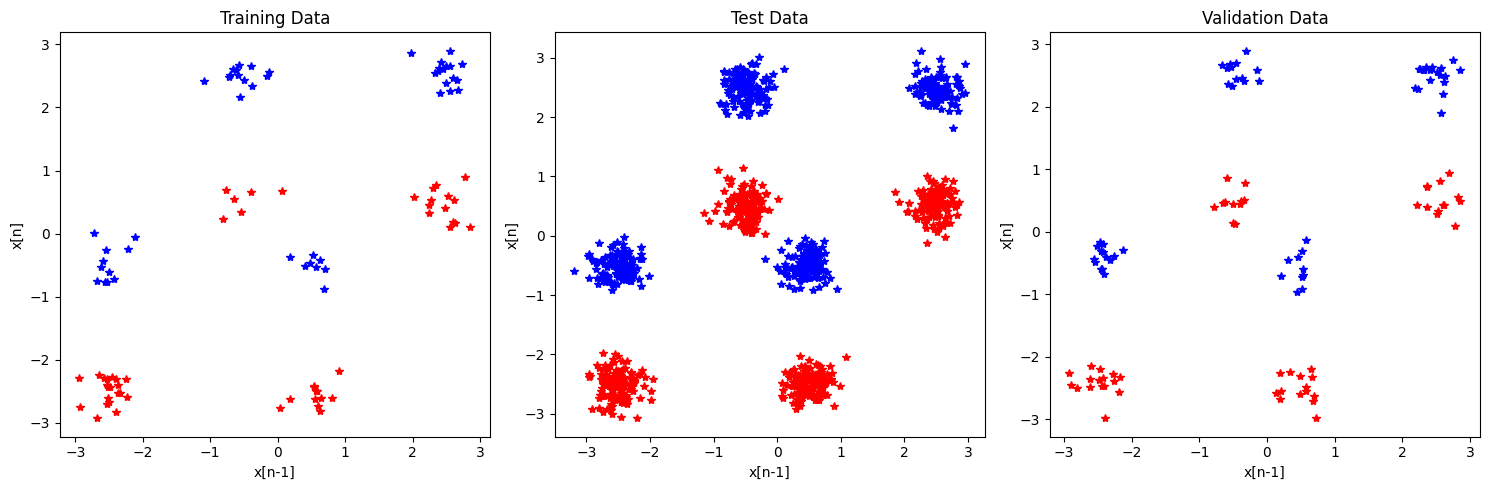

In [29]:
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y


data_alpha = 1.5  # Parameter 'a' for data generation
N_train = 100  # Number of training samples
X_train, y_train = data(N_train, data_alpha)

N_Val = 110  # Number of validation samples
X_Val, y_Val = data(N_Val, data_alpha)

N_test = 1000  # Number of test samples
X_test, y_test = data(N_test, data_alpha)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_Val: ", X_Val.shape)
print("Shape of y_Val: ", y_Val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)


plt.figure(figsize=(15, 5))

plt.subplot(131)
ind1=np.where(y_train==1)
ind2=np.where(y_train==-1)
plt.plot(X_train[0,ind1],X_train[1,ind1],'b*')
plt.plot(X_train[0,ind2],X_train[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Training Data')

plt.subplot(132)
ind1=np.where(y_test==1)
ind2=np.where(y_test==-1)
plt.plot(X_test[0,ind1],X_test[1,ind1],'b*')
plt.plot(X_test[0,ind2],X_test[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Test Data')

plt.subplot(133)
ind1=np.where(y_Val==1)
ind2=np.where(y_Val==-1)
plt.plot(X_Val[0,ind1],X_Val[1,ind1],'b*')
plt.plot(X_Val[0,ind2],X_Val[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Validation Data')

plt.tight_layout()
plt.show()


# Linear Kernel

Completed  1  out of  11  iterations
Completed  2  out of  11  iterations
Completed  3  out of  11  iterations
Completed  4  out of  11  iterations
Completed  5  out of  11  iterations
Completed  6  out of  11  iterations
Completed  7  out of  11  iterations
Completed  8  out of  11  iterations
Completed  9  out of  11  iterations
Completed  10  out of  11  iterations
Completed  11  out of  11  iterations
Best C for Linear Kernel:  0.1
Validation error for Linear Kernel:  0.7636363636363637


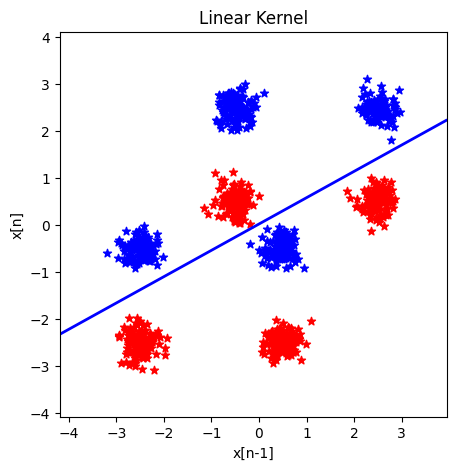

In [30]:
# Computing kernel matrices
K_linear = linear_kernel(X_train.T, X_train.T)
C_high = 5; C_low = -5
C_Values = np.logspace(C_low, C_high, C_high - C_low + 1, base=10)

MMSE_linear = np.zeros(len(C_Values))
total_iterations = len(C_Values)

# Train SVM with precomputed kernel matrices
for i, C in enumerate(C_Values):
    clf_linear = svm.SVC(kernel='precomputed', C=C)

    # Fit the model
    clf_linear.fit(K_linear, y_train)

    # Validation set
    K_val_linear = linear_kernel(X_Val.T, X_train.T)

    # Predict on validation set
    y_pred_linear = clf_linear.predict(K_val_linear)
    
    # Compute validation error
    val_error_linear = np.mean(y_pred_linear != y_Val)
    # MMSE_linear[i] = mean_squared_error(y_Val, y_pred_linear)
    MMSE_linear[i] = np.mean((y_pred_linear - y_Val)**2)

    # % Complete status update
    print("Completed ", i+1, " out of ", total_iterations, " iterations")

    

# Find the indices of the best hyperparameters
best_index_linear = np.argmin(MMSE_linear)
best_C_linear = C_Values[best_index_linear]

# Training the SVM with best hyperparameters on the test set
clf_linear_best = svm.SVC(kernel='precomputed', C=best_C_linear)
clf_linear_best.fit(K_linear, y_train)
K_test_linear = linear_kernel(X_test.T, X_train.T)
y_pred_linear = clf_linear_best.predict(K_test_linear)
# test_MMSE_linear = mean_squared_error(y_test, y_pred_linear)
test_MMSE_linear = np.mean((y_test - y_pred_linear)**2)

# Print validation errors
print("Best C for Linear Kernel: ", best_C_linear)
print("Validation error for Linear Kernel: ", MMSE_linear[best_index_linear])

# Printing and plotting the results

# Generate a grid of points
x_min_plot = X_test[0, :].min() - 1
x_max_plot = X_test[0, :].max() + 1
y_min_plot = X_test[1, :].min() - 1
y_max_plot = X_test[1, :].max() + 1
x_meshgrid, y_meshgrid = np.meshgrid(np.linspace(x_min_plot, x_max_plot, 100), np.linspace(y_min_plot, y_max_plot, 100))

# Combine x_meshgrid and y_meshgrid into a single matrix
grid_points = np.c_[x_meshgrid.ravel(), y_meshgrid.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_linear = linear_kernel(grid_points, X_train.T)

# Predict on grid points for each kernel
Z_linear = clf_linear_best.decision_function(K_test_linear)

# Reshape the decision function values
Z_linear = Z_linear.reshape(x_meshgrid.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(5, 5))
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.contour(x_meshgrid, y_meshgrid, Z_linear, levels=[0], linewidths=2, colors='blue')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Linear Kernel')
plt.show()

# Polynomial Order 3 Kernel

Completed  1  out of  11  iterations
Completed  2  out of  11  iterations
Completed  3  out of  11  iterations
Completed  4  out of  11  iterations
Completed  5  out of  11  iterations


Completed  6  out of  11  iterations
Completed  7  out of  11  iterations
Completed  8  out of  11  iterations
Completed  9  out of  11  iterations
Completed  10  out of  11  iterations
Completed  11  out of  11  iterations
Best C for Polynomial Kernel:  1.0
Validation error for Polynomial Kernel:  0.03636363636363636


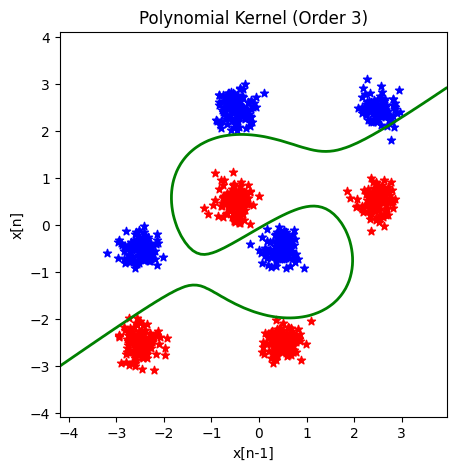

In [31]:
# Kernel Parameter
degree = 3
C_low = -5 ; C_high = 5
C_Values = np.logspace(C_low, C_high, C_high - C_low + 1, base=10)

MMSE_poly = np.zeros(len(C_Values))

# Computing kernel matrices
K_poly = polynomial_kernel(X_train.T, X_train.T, degree=degree)

# Train SVM with precomputed kernel matrices
for i, C in enumerate(C_Values):
    clf_poly = svm.SVC(kernel='precomputed', C=C)

    # Fit the model
    clf_poly.fit(K_poly, y_train)

    # Validation set
    K_val_poly = polynomial_kernel(X_Val.T, X_train.T, degree=degree)

    # Predict on validation set
    y_pred_poly = clf_poly.predict(K_val_poly)

    # Compute validation error
    # MMSE_poly[i] = mean_squared_error(y_Val, y_pred_poly)
    MMSE_poly[i] = np.mean((y_pred_poly - y_Val)**2)
    
    # % Complete status update
    print("Completed ", i+1, " out of ", total_iterations, " iterations")

# Find the indices of the best hyperparameters
best_index_poly = np.argmin(MMSE_poly)
best_C_poly = C_Values[best_index_poly]

# Training the SVM with best hyperparameters on the test set
clf_poly_best = svm.SVC(kernel='precomputed', C=best_C_poly)
clf_poly_best.fit(K_poly, y_train)
K_test_poly = polynomial_kernel(X_test.T, X_train.T, degree=degree)
y_pred_poly = clf_poly_best.predict(K_test_poly)
# test_MMSE_poly = mean_squared_error(y_test, y_pred_poly)
test_MMSE_poly = np.mean((y_test-y_pred_poly)**2)

# Print Validation errors
print("Best C for Polynomial Kernel: ", best_C_poly)
print("Validation error for Polynomial Kernel: ", MMSE_poly[best_index_poly])

# Plotting the results

# Generate a grid of points
x_min_plot = X_test[0, :].min() - 1
x_max_plot = X_test[0, :].max() + 1
y_min_plot = X_test[1, :].min() - 1
y_max_plot = X_test[1, :].max() + 1
x_meshgrid, y_meshgrid = np.meshgrid(np.linspace(x_min_plot, x_max_plot, 100), np.linspace(y_min_plot, y_max_plot, 100))

# Combine x_meshgrid and y_meshgrid into a single matrix
grid_points = np.c_[x_meshgrid.ravel(), y_meshgrid.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_poly = polynomial_kernel(grid_points, X_train.T, degree=degree)

# Predict on grid points for each kernel
Z_poly = clf_poly_best.decision_function(K_test_poly)

# Reshape the decision function values
Z_poly = Z_poly.reshape(x_meshgrid.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(5, 5))
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.contour(x_meshgrid, y_meshgrid, Z_poly, levels=[0], linewidths=2, colors='green')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Polynomial Kernel (Order 3)')
plt.show()

# Radial Basis Function Kernel

Completed  1  out of  121  iterations
Completed  2  out of  121  iterations
Completed  3  out of  121  iterations
Completed  4  out of  121  iterations
Completed  5  out of  121  iterations
Completed  6  out of  121  iterations
Completed  7  out of  121  iterations
Completed  8  out of  121  iterations
Completed  9  out of  121  iterations
Completed  10  out of  121  iterations
Completed  11  out of  121  iterations
Completed  12  out of  121  iterations
Completed  13  out of  121  iterations
Completed  14  out of  121  iterations
Completed  15  out of  121  iterations
Completed  16  out of  121  iterations
Completed  17  out of  121  iterations
Completed  18  out of  121  iterations
Completed  19  out of  121  iterations
Completed  20  out of  121  iterations
Completed  21  out of  121  iterations
Completed  22  out of  121  iterations
Completed  23  out of  121  iterations
Completed  24  out of  121  iterations
Completed  25  out of  121  iterations
Completed  26  out of  121  iterat

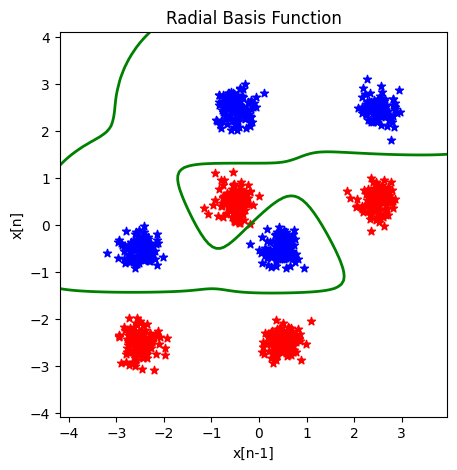

In [32]:
gamma_low = -5 ; gamma_high = 5
C_low = -5 ; C_high = 5

gamma_values = np.logspace(gamma_low, gamma_high, gamma_high-gamma_low+1, base=10)
C_values = np.logspace(gamma_low, gamma_high, C_high-C_low+1, base=10)

mse_values = np.zeros((len(gamma_values), len(C_values)))
total_iterations = len(gamma_values) * len(C_values)
iteration_count = 0
#Computing the kernel matrices
K_rbf = rbf_kernel(X_train.T, X_train.T)

for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        clf_rbf = svm.SVC(kernel='precomputed', C=c)
        clf_rbf.fit(K_rbf, y_train)
        
        # Validating the model
        K_val_rbf = rbf_kernel(X_Val.T,X_train.T, gamma=gamma)

        # Predict on validation set
        Yval_Pred_rbf = clf_rbf.predict(K_val_rbf)        

        # mse_val_value = mean_squared_error(y_Val, Yval_Pred_rbf)
        mse_val_value = np.mean((y_Val - Yval_Pred_rbf)**2)
        mse_values[i, j] = mse_val_value
        
        # % Complete status update
        iteration_count += 1
        print("Completed ", iteration_count, " out of ", total_iterations, " iterations")


best_gamma_index, best_C_index = np.unravel_index(np.argmin(mse_values), mse_values.shape)
best_gamma = gamma_values[best_gamma_index]
best_C = C_values[best_C_index]
best_val_MSE = mse_values[best_gamma_index, best_C_index]

print("Best gamma: ", best_gamma)
print("Best C: ", best_C)
print(f"Best validation MSE: {best_val_MSE:.7f}")

# Training the model with the best hyperparameters on the test set
clf_rbf_best = svm.SVC(kernel='precomputed', C=best_C)
clf_rbf_best.fit(K_rbf, y_train)
K_test_rbf = rbf_kernel(X_test.T, X_train.T,gamma=best_gamma)
y_pred_rbf = clf_rbf_best.predict(K_test_rbf)
test_MMSE_rbf = np.mean((y_test - y_pred_rbf)**2)

# Generate a grid of points
x_min_plot = X_test[0, :].min() - 1
x_max_plot = X_test[0, :].max() + 1
y_min_plot = X_test[1, :].min() - 1
y_max_plot = X_test[1, :].max() + 1
x_meshgrid, y_meshgrid = np.meshgrid(np.linspace(x_min_plot, x_max_plot, 100), np.linspace(y_min_plot, y_max_plot, 100))

# Combine x_meshgrid and y_meshgri into a single matrix
grid_points = np.c_[x_meshgrid.ravel(), y_meshgrid.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_rbf = rbf_kernel(grid_points, X_train.T, gamma=best_gamma)

# Predict on grid points for each kernel
Z_rbf = clf_rbf_best.decision_function(K_test_rbf)

# Reshape the decision function values
Z_rbf = Z_rbf.reshape(x_meshgrid.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(5, 5))
plt.contour(x_meshgrid, y_meshgrid, Z_rbf, levels=[0], linewidths=2, colors='green')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Radial Basis Function')
plt.show()